## TEST

In [133]:
# here we try to find the most importan features that affect sleep quality
# we use random forest to find the most important features
# we use the data from the previous step (data_preprocessing.ipynb)

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# read the data
df = pd.read_csv('../data/data_combined_final.csv')

# drop the first column (index)
df.drop(df.columns[0], axis=1, inplace=True)
# drop the country column
df.drop('country', axis=1, inplace=True)

# since there is a lot of missing values in the data, we fill in missing values with the median (for numerical 
# values) or mode (for categorical values)
# numerical columns are :
# Steps, Socialize (min), Alcohol (bev), People contact, Worry (scale), PHQ9, 
# PANAS (NA),PANAS (PA), latency, Wakes, Sleeptime (h), Age Group
# 
# Categorical columns are
# Leave house,Exercise, Stress, Worry (health), Worry (finances), Isolation, Student
# Age Group, Restfulness, Wakes (scale), Nervousness, Depression, Anxiety, 
# Insomnia,Exercise (scale),Food Healthiness, Alcohol

# fill in missing values with median (for numerical values) or mode (for categorical values)
df['Steps'].fillna(df['Steps'].median(), inplace=True)
df['Socialize (min)'].fillna(df['Socialize (min)'].median(), inplace=True)
df['Alcohol (bev)'].fillna(df['Alcohol (bev)'].median(), inplace=True)
df['People contact'].fillna(df['People contact'].median(), inplace=True)
df['Worry (scale)'].fillna(df['Worry (scale)'].median(), inplace=True)
df['PHQ9'].fillna(df['PHQ9'].median(), inplace=True)
df['PANAS (NA)'].fillna(df['PANAS (NA)'].median(), inplace=True)    
df['PANAS (PA)'].fillna(df['PANAS (PA)'].median(), inplace=True)
df['Latency'].fillna(df['Latency'].median(), inplace=True)
df['Wakes'].fillna(df['Wakes'].median(), inplace=True)
df['Sleeptime (h)'].fillna(df['Sleeptime (h)'].median(), inplace=True)
df['Age Group'].fillna(df['Age Group'].mode()[0], inplace=True)
df['Leave house'].fillna(df['Leave house'].mode()[0], inplace=True)
df['Exercise'].fillna(df['Exercise'].mode()[0], inplace=True)
df['Stress'].fillna(df['Stress'].mode()[0], inplace=True)
df['Worry (health)'].fillna(df['Worry (health)'].mode()[0], inplace=True)
df['Worry (finances)'].fillna(df['Worry (finances)'].mode()[0], inplace=True)
df['Isolation'].fillna(df['Isolation'].mode()[0], inplace=True)
df['student'].fillna(df['student'].mode()[0], inplace=True)
df['Restfulness'].fillna(df['Restfulness'].mode()[0], inplace=True)
df['Wakes (scale)'].fillna(df['Wakes (scale)'].mode()[0], inplace=True)
df['Nervousness'].fillna(df['Nervousness'].mode()[0], inplace=True)
df['Depression'].fillna(df['Depression'].mode()[0], inplace=True)
df['Anxiety'].fillna(df['Anxiety'].mode()[0], inplace=True)
df['Insomnia'].fillna(df['Insomnia'].mode()[0], inplace=True)
df['Exercise (scale)'].fillna(df['Exercise (scale)'].mode()[0], inplace=True)
df['Food Healthiness'].fillna(df['Food Healthiness'].mode()[0], inplace=True)
df['Alcohol'].fillna(df['Alcohol'].mode()[0], inplace=True)

# check if there is any missing values left
df.isnull().sum()

# we use random forest to find the most important features from the df
# we use the default parameters, so all 
# we create four random forest classifiers one for sleep latency, one for 
# number of wakes, and one for sleep duration and finally one for sleep quality (Restfulness)

# we create a list of the features that we want to use for the random forest classifier
# we use all the features except the sleep quality (Restfulness)


#


Steps               0
Socialize (min)     0
Leave house         0
People contact      0
Alcohol (bev)       0
Exercise            0
Stress              0
Worry (scale)       0
Worry (finances)    0
Worry (health)      0
PHQ9                0
PANAS (NA)          0
PANAS (PA)          0
Isolation           0
Latency             0
Wakes               0
Sleeptime (h)       0
student             0
Age Group           0
Restfulness         0
Wakes (scale)       0
Nervousness         0
Depression          0
Anxiety             0
Insomnia            0
Exercise (scale)    0
Food Healthiness    0
Alcohol             0
dtype: int64

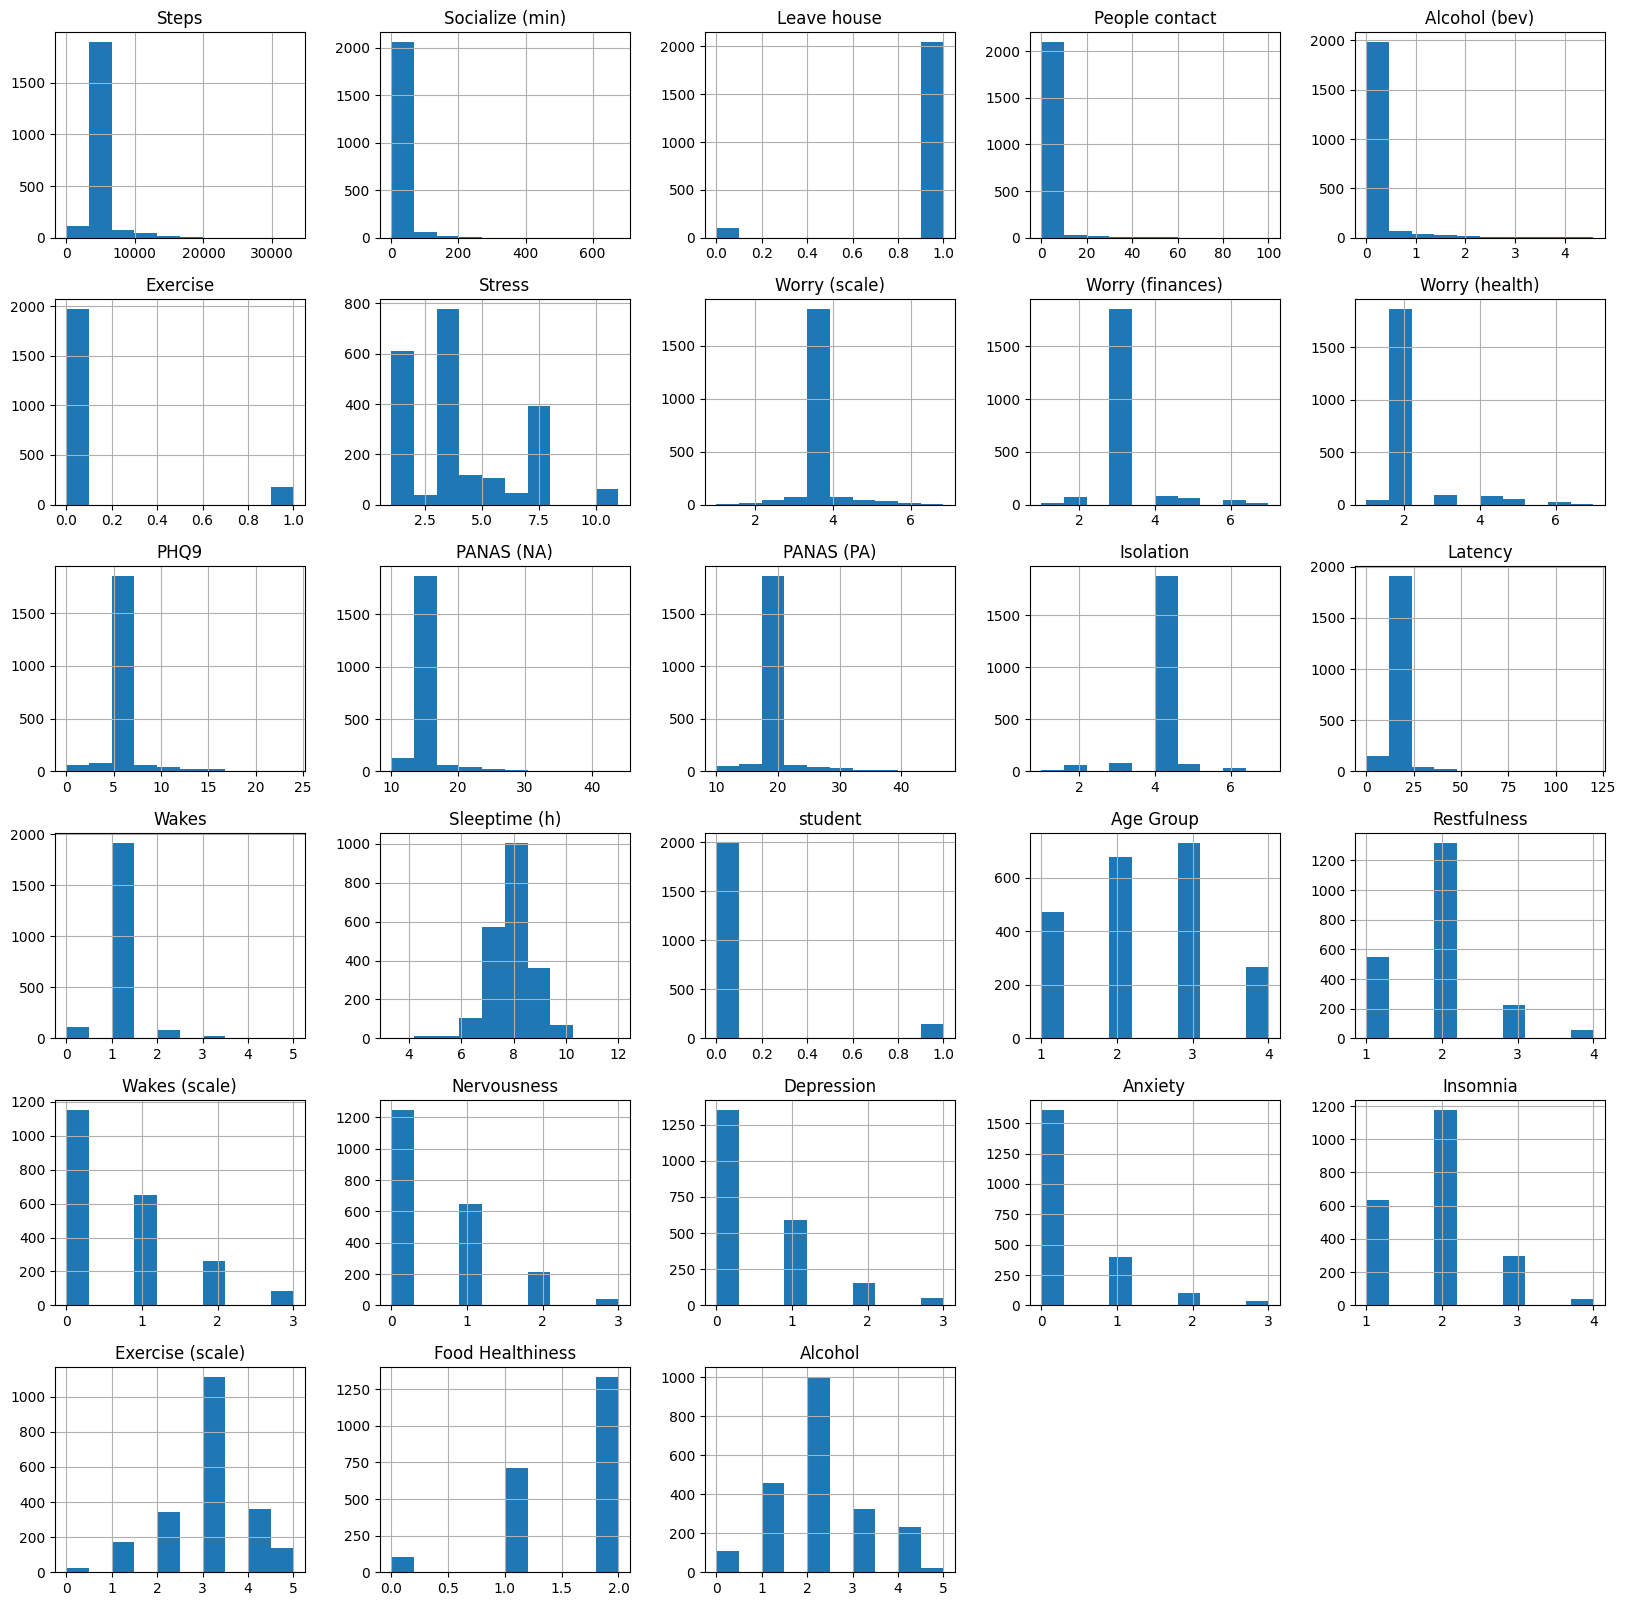

In [134]:
# plot the distribution of the values in the dataset
df.hist(figsize=(20,20))
plt.show()


In [115]:
# get the columns names
cols = df.columns.tolist()
print(cols)

['Steps', 'Socialize (min)', 'Leave house', 'People contact', 'Alcohol (bev)', 'Exercise', 'Stress', 'Worry (scale)', 'Worry (finances)', 'Worry (health)', 'PHQ9', 'PANAS (NA)', 'PANAS (PA)', 'Isolation', 'Latency', 'Wakes', 'Sleeptime (h)', 'student', 'Age Group', 'Restfulness', 'Wakes (scale)', 'Nervousness', 'Depression', 'Anxiety', 'Insomnia', 'Exercise (scale)', 'Food Healthiness', 'Alcohol']


In [116]:

# trying to find the most important features for Restfulness which is a categorical variable

# lets define the numerical columns to a list
num_columns = ['Steps', 'Socialize (min)', 'Alcohol (bev)', 'People contact', 'Worry (scale)', 'PHQ9',
                'PANAS (NA)', 'PANAS (PA)', 'Latency', 'Wakes', 'Sleeptime (h)']

# lets define the categorical columns to a list
cat_columns = ['Age Group', 'Leave house', 'Exercise', 'Stress', 'Worry (health)', 'Worry (finances)',
                'Isolation', 'student', 'Wakes (scale)', 'Nervousness', 'Depression',
                'Anxiety', 'Insomnia', 'Exercise (scale)', 'Food Healthiness', 'Alcohol']



In [117]:
print(df.columns)


Index(['Steps', 'Socialize (min)', 'Leave house', 'People contact',
       'Alcohol (bev)', 'Exercise', 'Stress', 'Worry (scale)',
       'Worry (finances)', 'Worry (health)', 'PHQ9', 'PANAS (NA)',
       'PANAS (PA)', 'Isolation', 'Latency', 'Wakes', 'Sleeptime (h)',
       'student', 'Age Group', 'Restfulness', 'Wakes (scale)', 'Nervousness',
       'Depression', 'Anxiety', 'Insomnia', 'Exercise (scale)',
       'Food Healthiness', 'Alcohol'],
      dtype='object')


In [123]:
# target variable is the Restfulness and the features are all the other columns
y = df['Restfulness']
X = df.drop(['Restfulness'], axis=1)

# scaling the numerical features
scaler = StandardScaler()
X[num_columns] = scaler.fit_transform(X[num_columns])






In [124]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)

# fit the random forest classifier
rf_fit = RandomForestClassifier(random_state=0, class_weight='balanced' ).fit(X_train, y_train)

# get the feature importances
importances = rf_fit.feature_importances_

# sort the features by their importance
sorted_index = np.argsort(importances)[::-1]

# get the names of the features
labels = np.array(cols)[sorted_index]


print (labels)



['Sleeptime (h)' 'Food Healthiness' 'Insomnia' 'Age Group' 'Restfulness'
 'Anxiety' 'Stress' 'Exercise (scale)' 'Wakes (scale)' 'Nervousness'
 'Depression' 'Worry (health)' 'PANAS (NA)' 'Worry (finances)'
 'Worry (scale)' 'PHQ9' 'Alcohol (bev)' 'Latency' 'Socialize (min)'
 'PANAS (PA)' 'Steps' 'People contact' 'Exercise' 'Isolation' 'student'
 'Wakes' 'Leave house']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


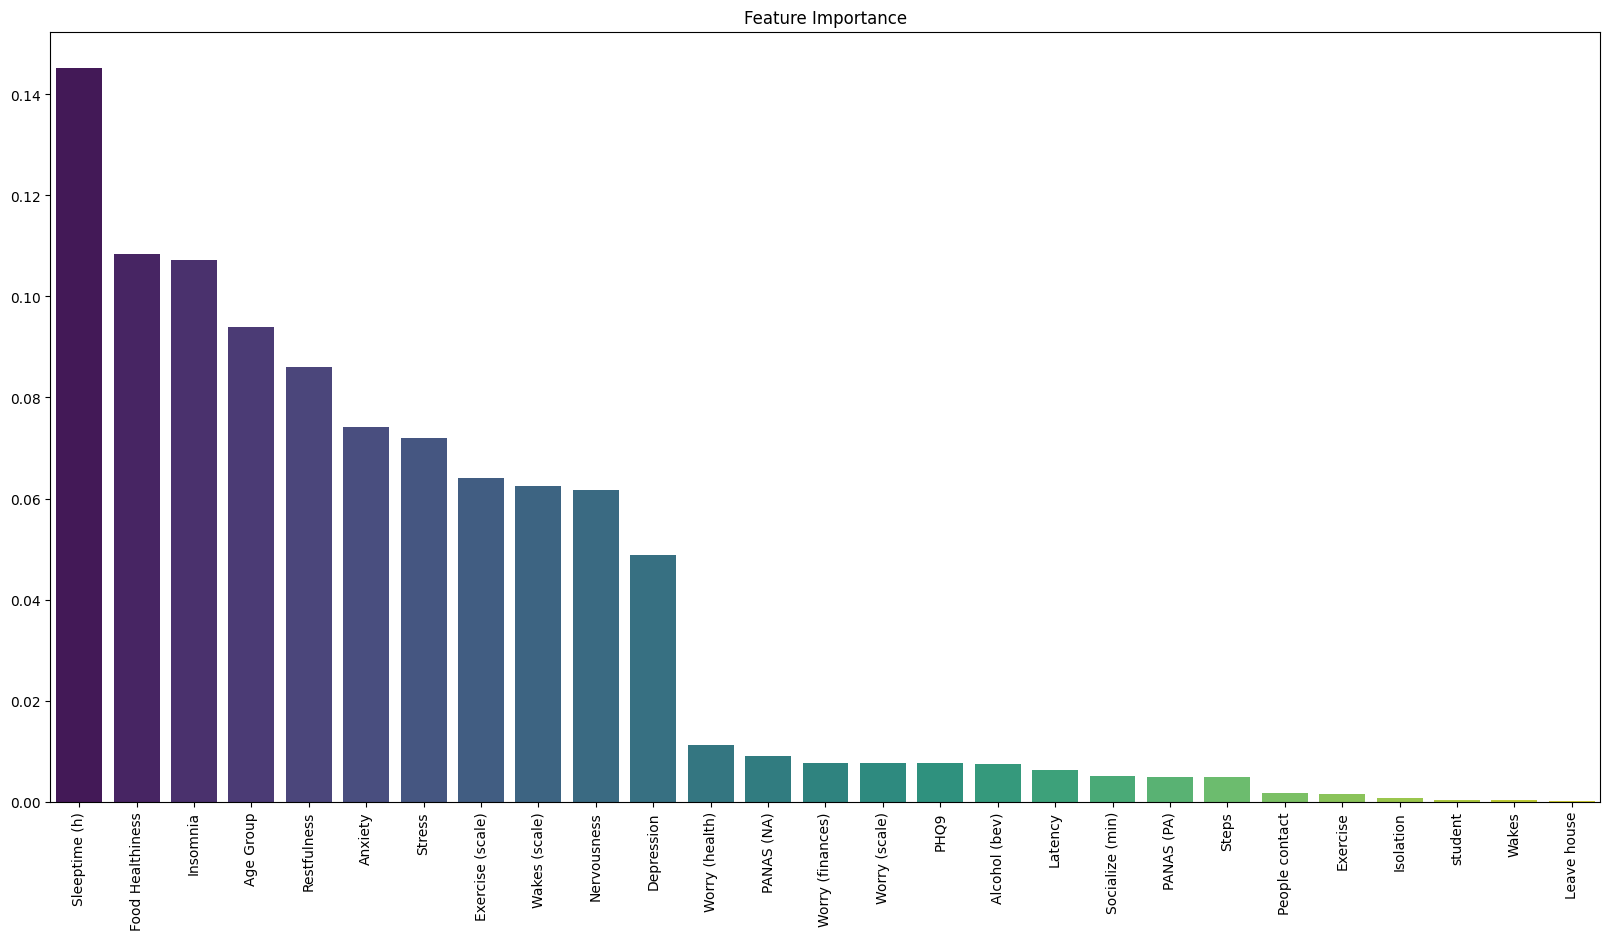

In [125]:
# plot the importance of the features
plt.figure(figsize=(20, 10))
sns.barplot(x=labels, y=importances[sorted_index], palette='viridis')
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()


In [126]:
# now lets evaluate the model on the test set

# get the predictions
y_pred = rf_fit.predict(X_test)

# get the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# get the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


                                   

array([[ 43,  72,   2,   0],
       [ 51, 289,  20,   0],
       [  5,  24,  19,   0],
       [  2,  10,   0,   0]])

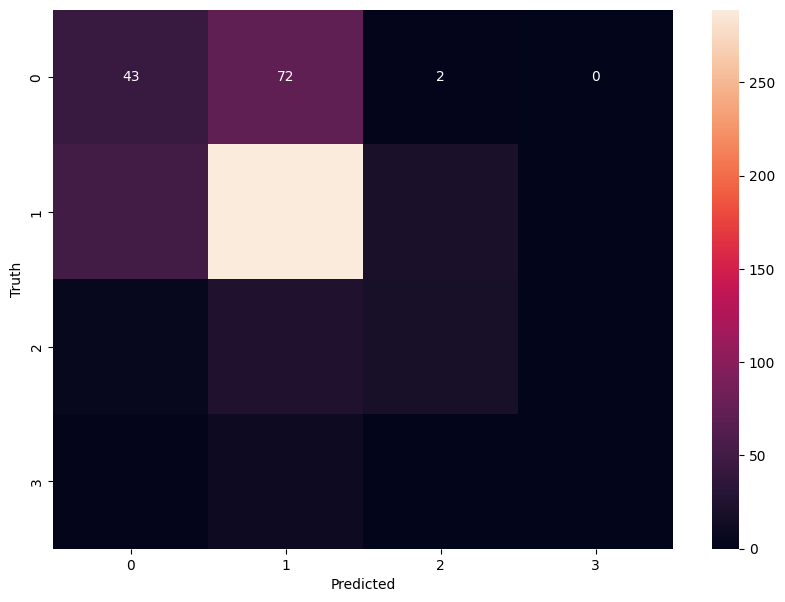

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the target for the test set
y_pred = rf_fit.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

model frequently misclassifies class 1 as 0 and vice versa, this suggests that the model is having difficulty distinguishing between these two classes. This could be due to various reasons, such as class imbalance, feature overlap between these two classes, or other limitations in the model or data
